In [1]:
import os

# move to project root
while True:
    # get list of directories
    dirs = os.listdir()
    if "README.md" in dirs:
        break
    else:
        os.chdir("..")
print(os.getcwd())

/home/ra/Codes/multilang_timescale


In [2]:
import json

from typing import List

from itertools import product

import matplotlib.pyplot as plt

In [3]:
from src.trainer import Trainer
from src.settings import TrainerConfig, SubjectConfig, FeatureConfig

In [4]:
from himalaya import kernel_ridge

In [6]:
def plot_flatmap(
    train_config_paths: List[str],
    feature_config_paths: List[str],
    subject_config_paths: List[str],
    feature_index: int = 0,
    is_corr: bool = True,
    save_dir=".temp/plots/",
):
    configs = list(
        product(subject_config_paths, train_config_paths, feature_config_paths)
    )
    for subject_config_path, train_config_path, feature_config_path in configs:
        with open(subject_config_path, "r") as f:
            subject_config = SubjectConfig(**json.load(f))
        with open(train_config_path, "r") as f:
            train_config = TrainerConfig(**json.load(f))
        with open(feature_config_path, "r") as f:
            feature_config = FeatureConfig(**json.load(f))
        trainer = Trainer(subject_config, feature_config)
        trainer.plot(
            trainer_config=train_config,
            feature_index=feature_index,
            is_corr=is_corr,
        )

        if os.path.exists(save_dir) == False:
            os.makedirs(save_dir)

        save_path = os.path.join(
            save_dir,
            f"{subject_config.sub_id}_{subject_config.task}_{feature_config.timescale}.png",
        )

        # plt.title(
        #     f"{subject_config.sub_id}_{subject_config.task}_{feature_config.timescale}"
        # )
        plt.savefig(save_path)

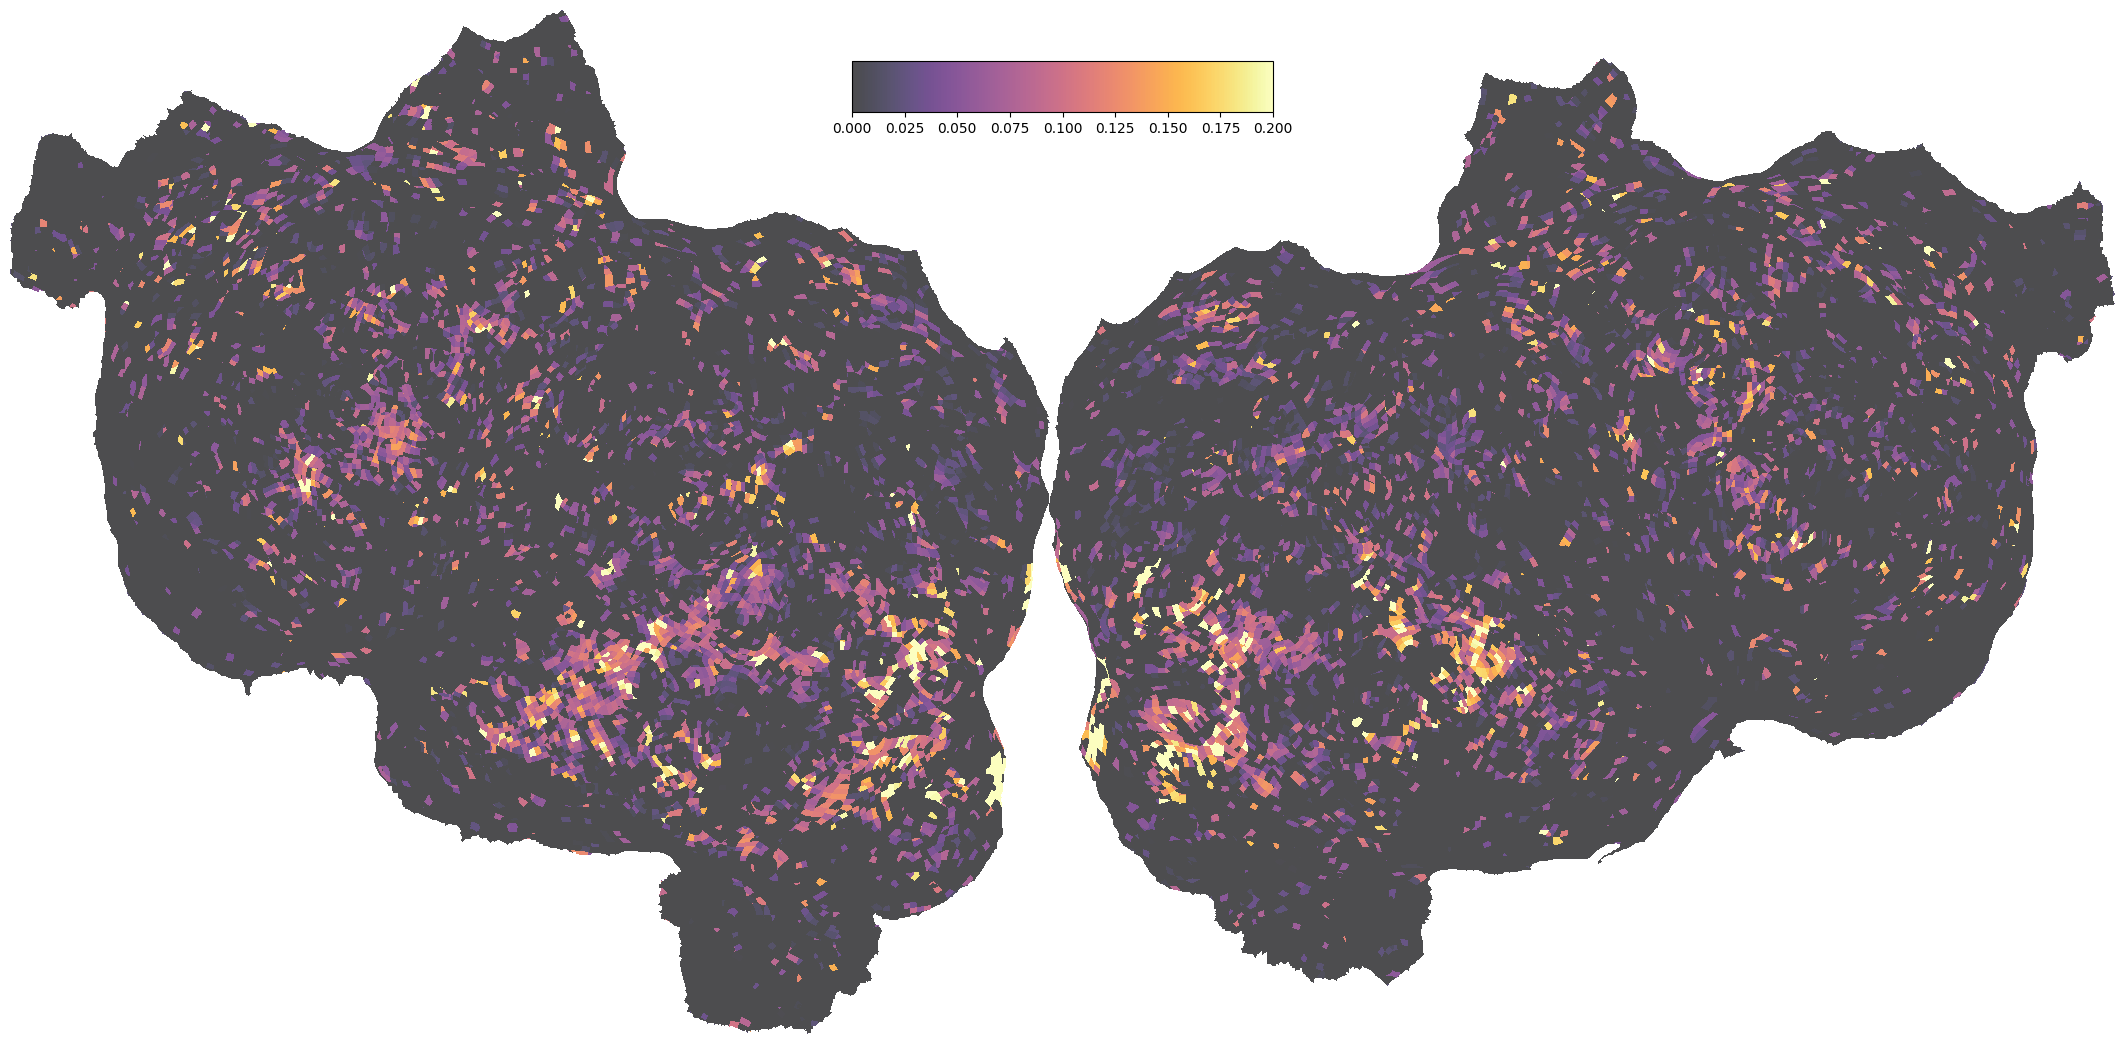

<Figure size 640x480 with 0 Axes>

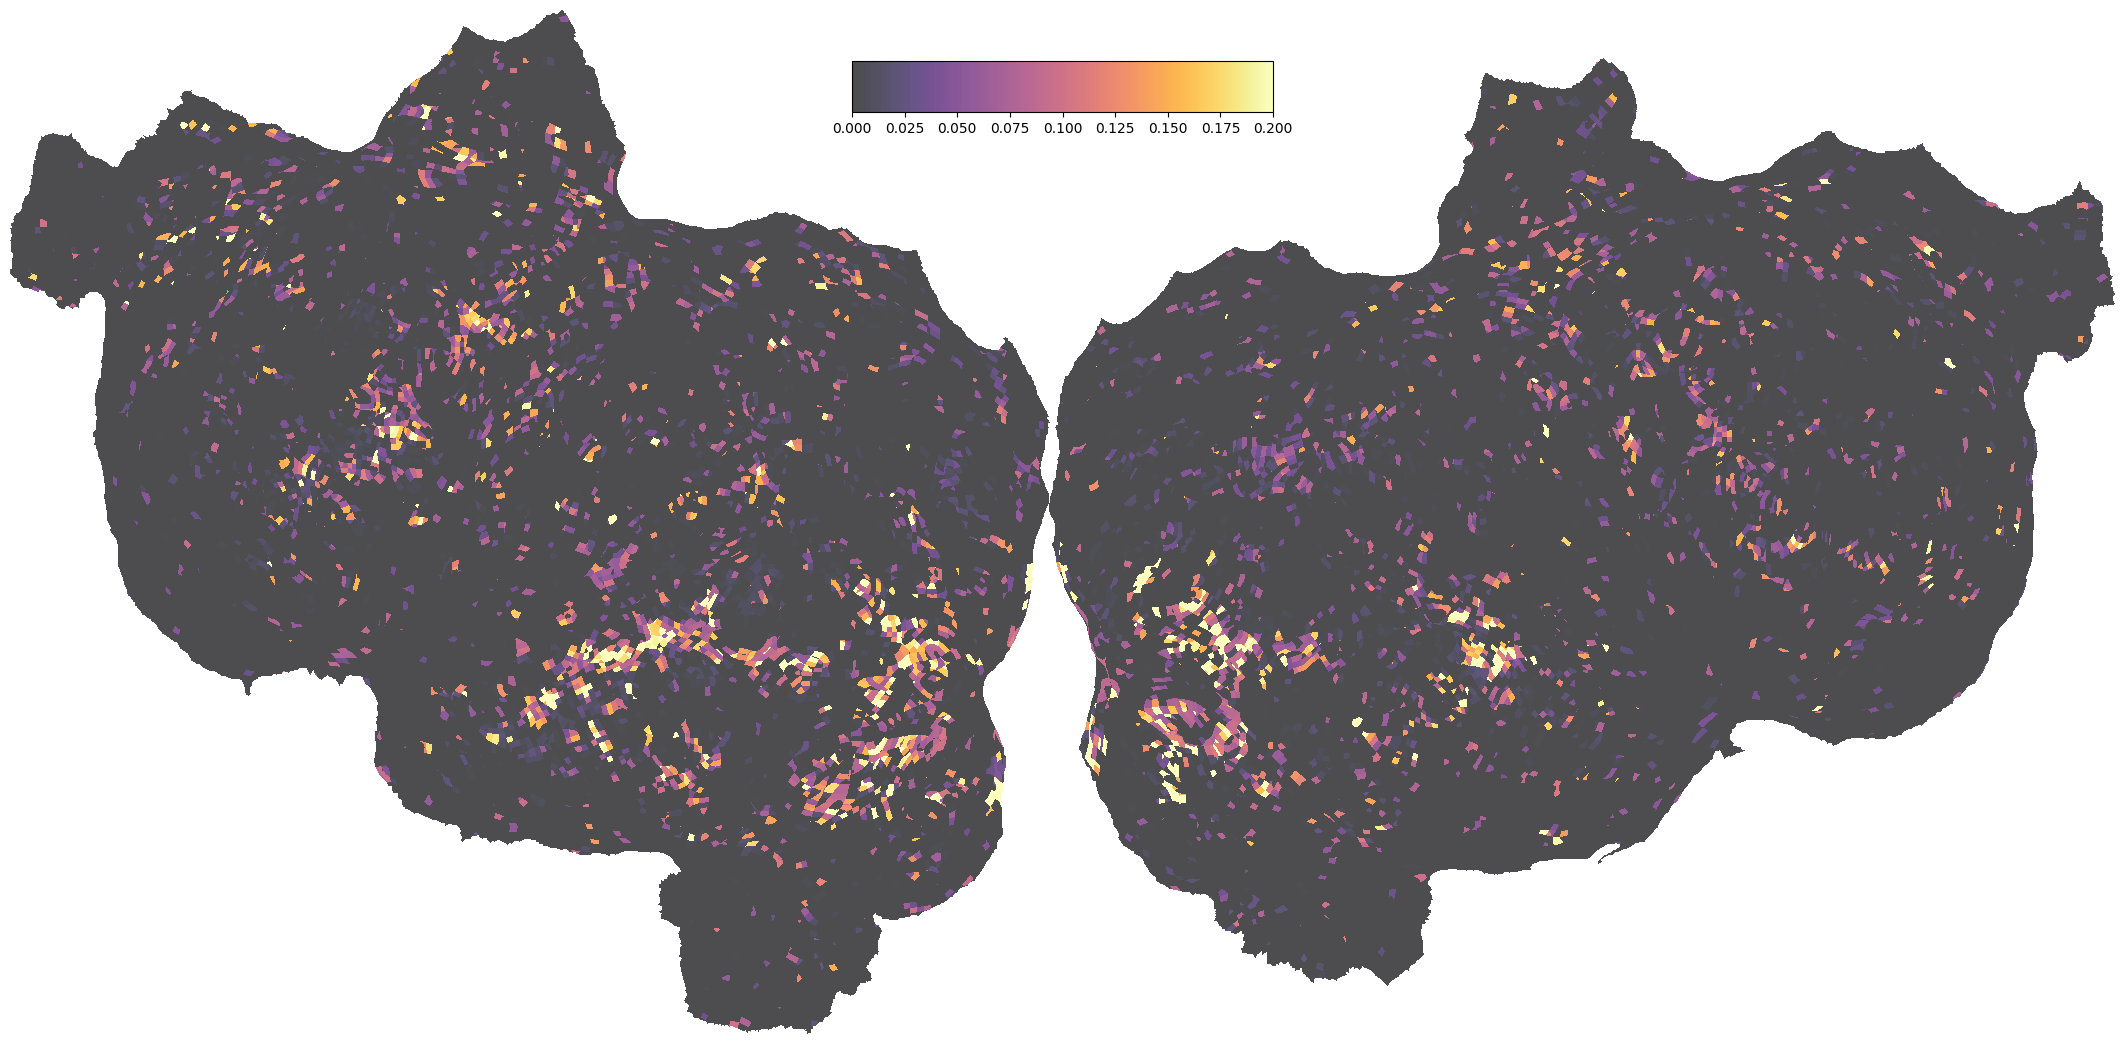

<Figure size 640x480 with 0 Axes>

In [7]:
# BERT
train_config_paths = [
    ".temp/config/train/bert_trainer_config.json",
]

feature_config_paths = [
    ".temp/config/feature/bert/2_4_words-feature_config.json",
    ".temp/config/feature/bert/256+ words-feature_config.json",
]

subject_config_paths = [
    ".temp/config/subject/subject-07-reading.json",
]

plot_flatmap(
    train_config_paths=train_config_paths,
    feature_config_paths=feature_config_paths,
    subject_config_paths=subject_config_paths,
    feature_index=-1,
    is_corr=True,
    save_dir=".temp/results/bert/plots/",
)

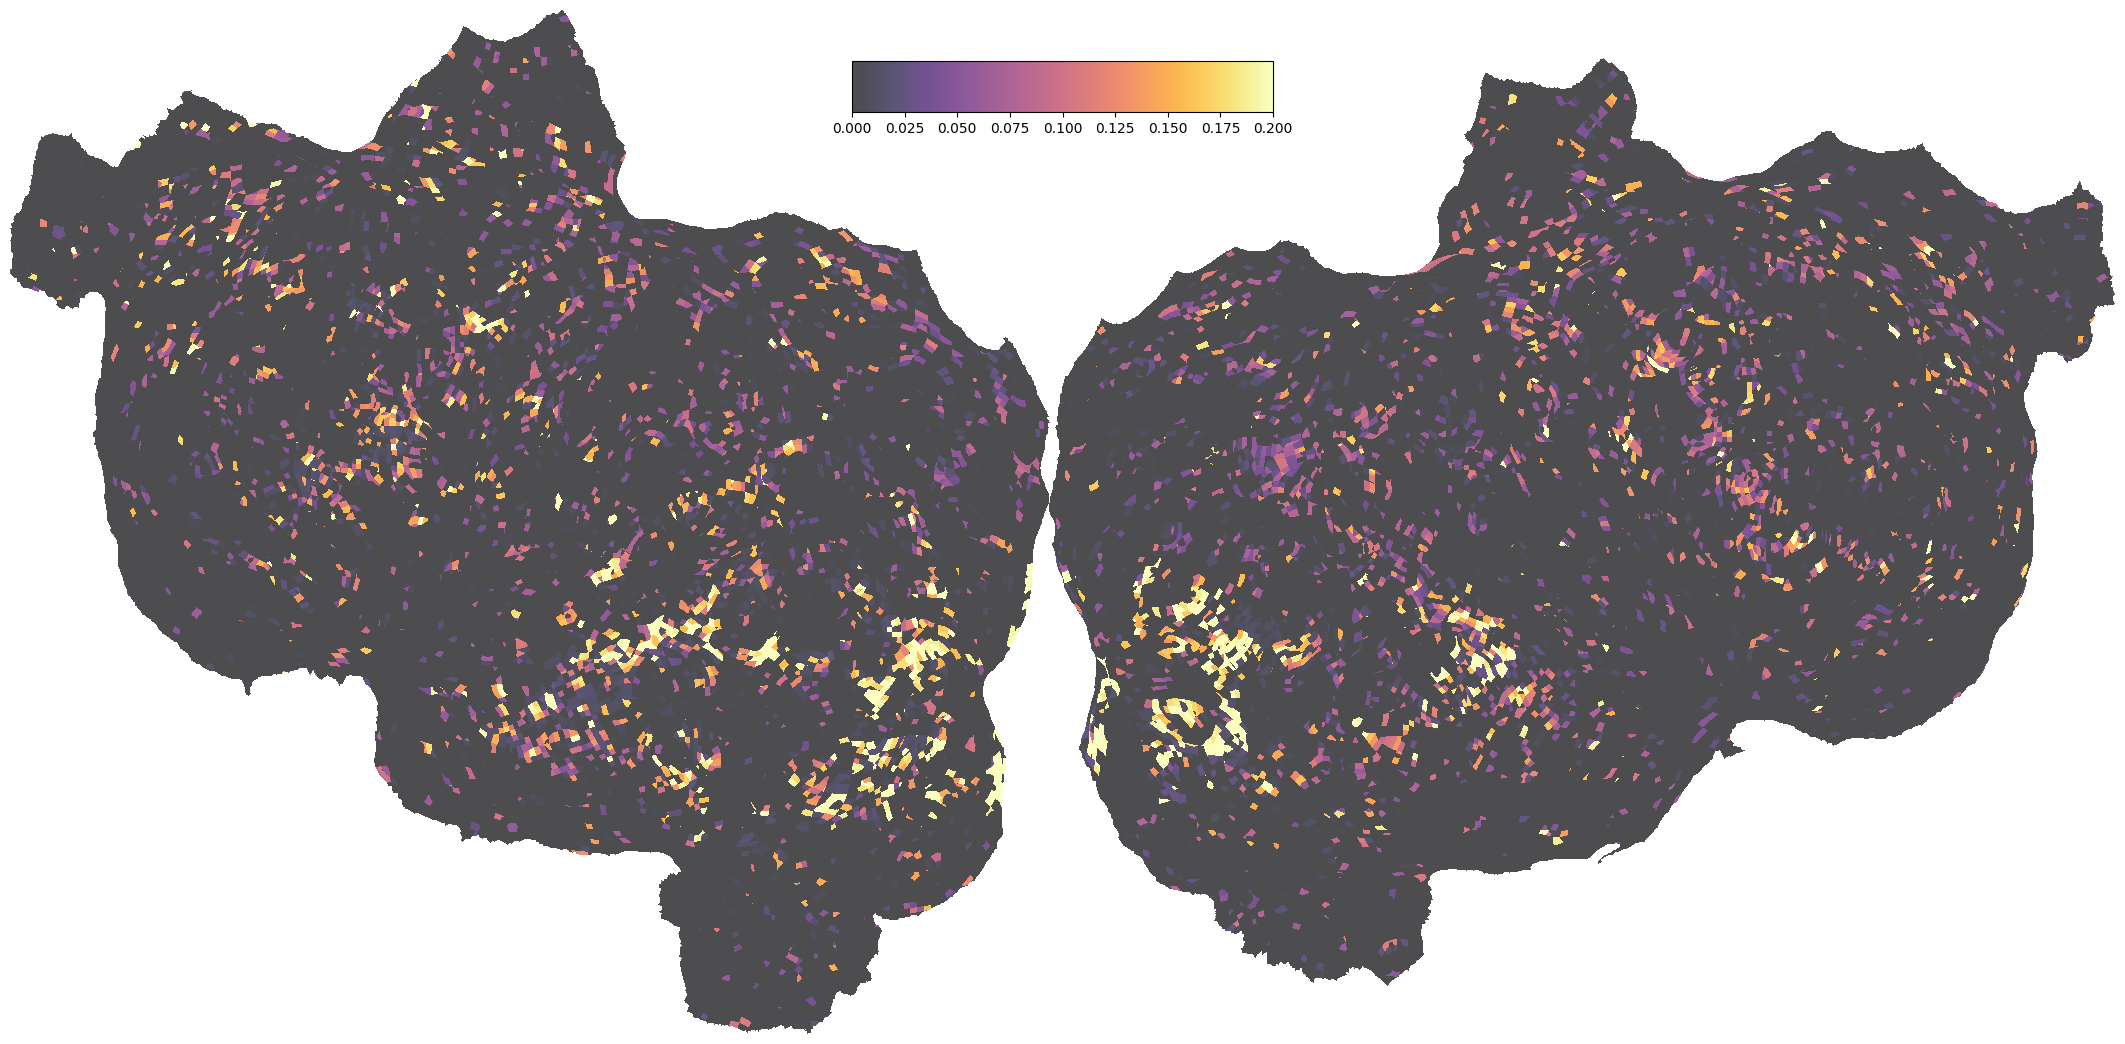

<Figure size 640x480 with 0 Axes>

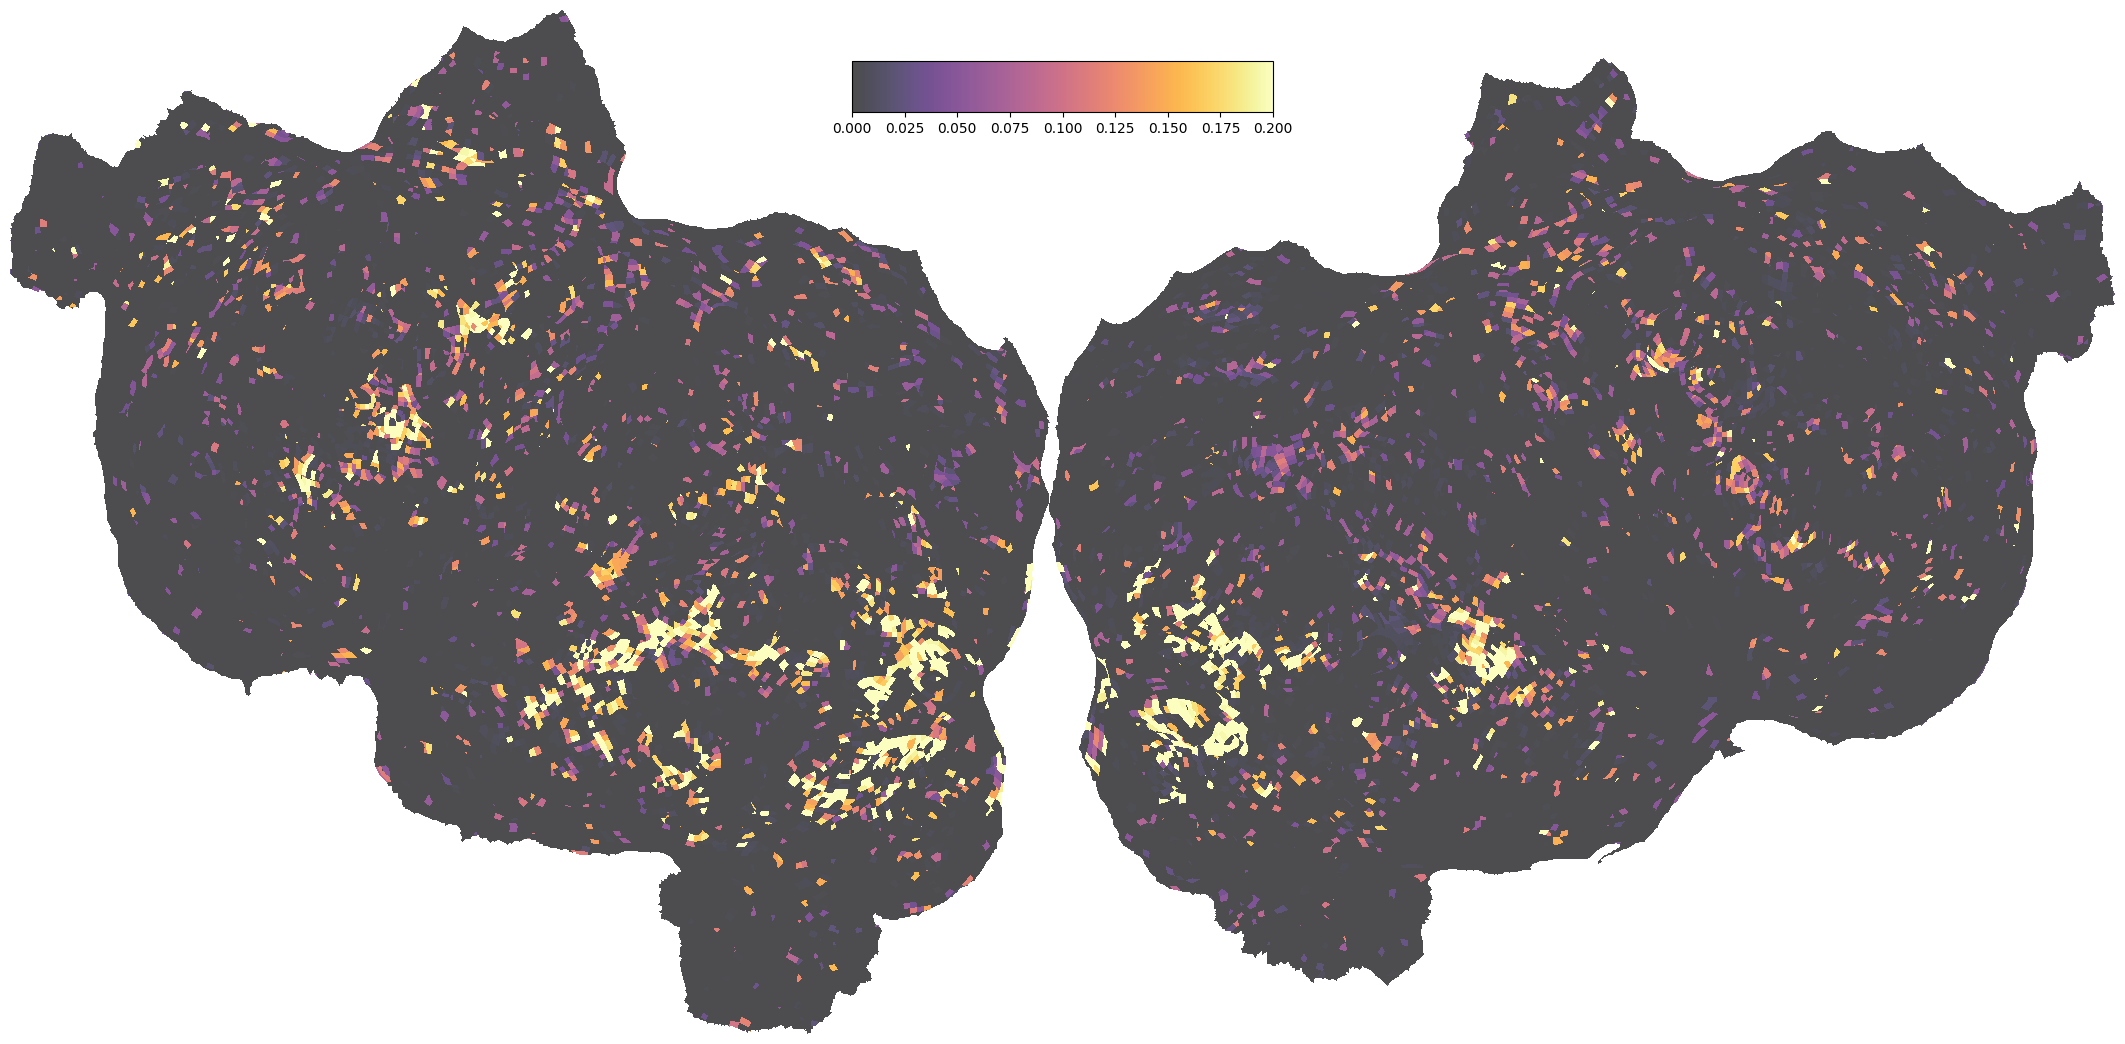

<Figure size 640x480 with 0 Axes>

In [8]:
# mBERT
train_config_paths = [
    ".temp/config/train/mbert_trainer_config.json",
]

feature_config_paths = [
    ".temp/config/feature/mbert/2_4_words-feature_config.json",
    ".temp/config/feature/mbert/256+ words-feature_config.json",
]

subject_config_paths = [
    ".temp/config/subject/subject-07-reading.json",
]

plot_flatmap(
    train_config_paths=train_config_paths,
    feature_config_paths=feature_config_paths,
    subject_config_paths=subject_config_paths,
    feature_index=-1,
    is_corr=True,
    save_dir=".temp/results/mbert/plots/",
)